In [831]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [832]:
df= pd.read_csv('../datasets/breast_cancer_data.csv')
df.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [833]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [834]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [835]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [836]:
df.drop('Unnamed: 32', inplace= True, axis= 1)

In [837]:
#converting the label column into category
df['diagnosis']= df['diagnosis'].astype('category')

[Text(0, 0, '357'), Text(0, 0, '212')]

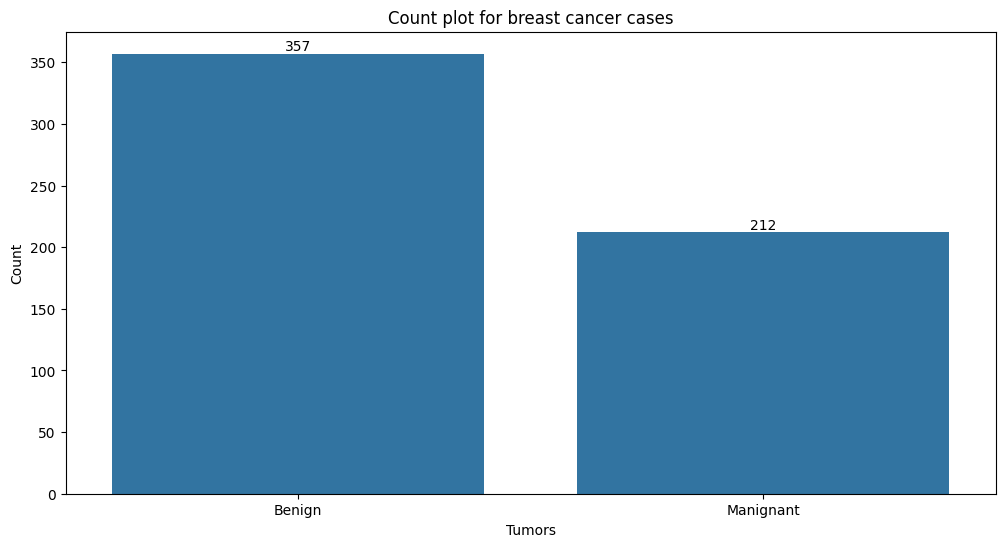

In [838]:
#countplot
fig, ax= plt.subplots(1, 1, figsize= (12,6))
sns.countplot(x= df['diagnosis'])
plt.xticks(
    ticks= [0,1],
    labels= ['Benign', 'Manignant']
)
plt.title('Count plot for breast cancer cases')
plt.xlabel('Tumors')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])

In [839]:
#start
le= LabelEncoder()
df['diagnosis_encoded']= le.fit_transform(df['diagnosis'])

X= df[['radius_mean', 'texture_mean', 'perimeter_mean', 'concavity_mean']].to_numpy()
y= df['diagnosis_encoded'].to_numpy().reshape(-1,1)

In [840]:
#splitting data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [841]:
print(f'Train X size: {X_train.shape}')
print(f'Test X size: {X_test.shape}')

Train X size: (455, 4)
Test X size: (114, 4)


In [842]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [843]:
#normalization/scaling X_train
X_train_mean = np.mean(X_train, axis= 0)
X_train_std = np.std(X_train, axis= 0)

print(f'Column wise mean= {X_train_mean}')
print(f'Column wise std= {X_train_std}') 

X_norm= (X_train - X_train_mean)/ X_train_std

Column wise mean= [1.41176352e+01 1.91850330e+01 9.18822418e+01 8.88981451e-02]
Column wise std= [ 3.53192761  4.26131404 24.29528447  0.07938051]


In [844]:
#adding row of 1s for bias
X_norm= np.c_[np.ones(X_train.shape[0]) , X_norm]
X_norm

array([[ 1.        , -1.44075296, -0.43531947, -1.36208497,  2.82313451],
       [ 1.        ,  1.97409619,  1.73302577,  2.09167167,  2.01311199],
       [ 1.        , -1.39998202, -1.24962228, -1.34520926, -0.36555756],
       ...,
       [ 1.        ,  0.04880192, -0.55500086, -0.06512547, -1.02856666],
       [ 1.        , -0.03896885,  0.10207345, -0.03137406,  0.29858532],
       [ 1.        , -0.54860557,  0.31327591, -0.60350155, -0.81969927]],
      shape=(455, 5))

In [845]:
def compute_cost(p_pred, y_train):
    m= y_train.shape[0]
    return (-1/m) * np.sum((y_train * np.log(p_pred)) + ((1 - y_train) * np.log(1- p_pred)))

In [846]:
def gradient_descent(X_train, y_train, W_b_init, alpha, epochs):
    cost_history= []
    W_b= W_b_init
    m= y_train.shape[0]

    for i in range(epochs):
        z= X_train @ W_b
        p_pred= sigmoid(z)
        dJ_dWb=  (-1/m)* (X_train.T @ (y_train- p_pred))
        W_b = W_b - alpha* dJ_dWb

        #keeping track of cost for plotting
        if(i%10==0):
            J = compute_cost(p_pred, y_train)
            cost_history.append(J)
    return W_b.flatten(), cost_history


In [ ]:
#training the model
W_b_init= np.zeros((1+ X_train.shape[1], 1))
epochs= 60000
alpha= 0.001

W_b, cost_hist= gradient_descent(X_norm, y_train, W_b_init, alpha, epochs)

In [848]:
def predict(X_test_norm, W_b, threshold):
    p_test_pred= sigmoid( X_test_norm @ W_b )

    final_preds= (p_test_pred.flatten() >= threshold).astype(int)
    
    return final_preds

In [849]:
#determining a good threshold
p_pred= sigmoid((X_norm @ W_b).flatten())
fpr, tpr, thresholds= roc_curve(y_train, p_pred)

youden_index= tpr- fpr
optimal_index= np.argmax(youden_index)
optimal_threshold= thresholds[optimal_index]

print(f"Optimal Threshold (Youden): {optimal_threshold:.3f}")
print(f"AUC Score: {roc_auc_score(y_train, p_pred):.3f}")

Optimal Threshold (Youden): 0.328
AUC Score: 0.977


In [850]:
#making final predictions on test data
X_test_mean= np.mean(X_test, axis=0)
X_test_std= np.std(X_test, axis=0)
X_test_norm= (X_test - X_test_mean)/ X_test_std
X_test_norm= np.c_[np.ones(X_test.shape[0]) , X_test_norm]
X_test_norm.shape

final_predictions= predict(X_test_norm, W_b, optimal_threshold)

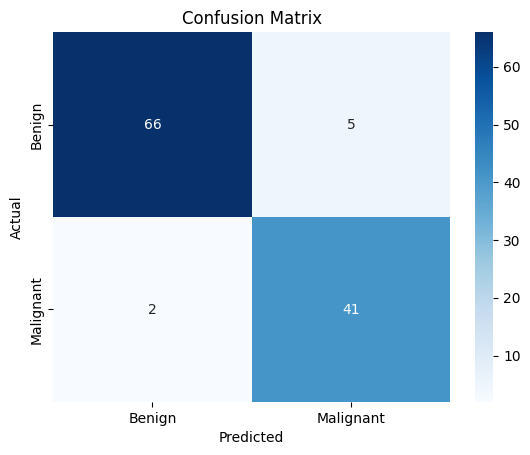

In [851]:
#Plotting Confusion matrix to visualize accuracy
cm= confusion_matrix(y_test, final_predictions)

sns.heatmap(cm, annot= True, cmap= 'Blues', xticklabels= ['Benign', 'Malignant'], yticklabels= ['Benign', 'Malignant'], cbar= True, linecolor= 'black')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [852]:
tn, fp, fn, tp= cm.ravel()
total= tn+ fp+ fn+ tp
print(f'True positive= {tp}')
print(f'False positive= {fp}')
print(f'True negative= {tn}')
print(f'False negative= {fn}')

True positive= 41
False positive= 5
True negative= 66
False negative= 2


In [853]:
#Evaluation metrics from scratch
accuracy= (tp+tn)/ total
precision= tp/(tp+ fp)
recall= tp/ (tp+ fn)
f1=  (2* precision * recall)/ (precision + recall)


print(f'Accuracy according to test data:  {accuracy *100 :.2f}%')
print(f'Precision according to test data:  {precision *100 :.2f}%')
print(f'Recall according to test data:  {recall *100 :.2f}%')
print(f'F1 score according to test data:  {f1 *100 :.2f}%')

Accuracy according to test data:  93.86%
Precision according to test data:  89.13%
Recall according to test data:  95.35%
F1 score according to test data:  92.13%


In [854]:
#sklearn evaluation
print(f'Accuracy according to test data:  {accuracy_score(y_test, final_predictions) *100 :.2f}%')
print(f'Precision according to test data:  {precision_score(y_test, final_predictions) *100 :.2f}%')
print(f'Recall according to test data:  {recall_score(y_test, final_predictions) *100 :.2f}%')
print(f'F1 score according to test data:  {f1_score(y_test, final_predictions) *100 :.2f}%')

Accuracy according to test data:  93.86%
Precision according to test data:  89.13%
Recall according to test data:  95.35%
F1 score according to test data:  92.13%


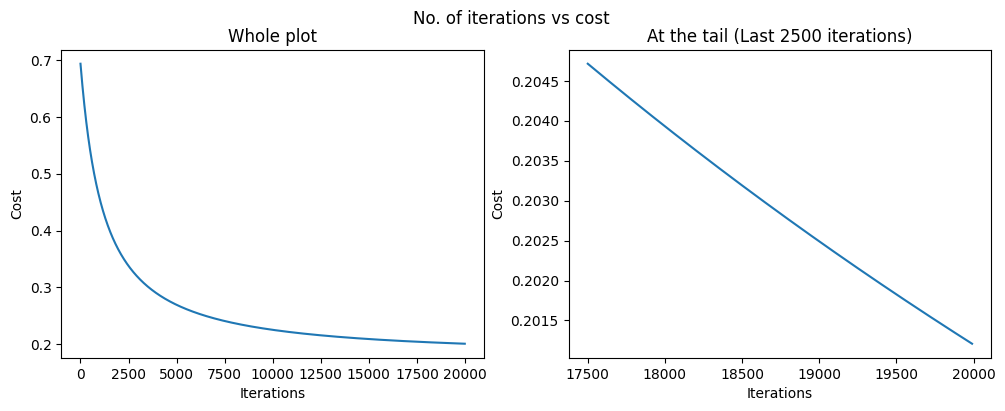

In [855]:
#plotting cost vs iterations
fig, (ax0, ax1)= plt.subplots(1, 2, figsize= (12,4))
fig.suptitle('No. of iterations vs cost')

iters= np.arange(0, epochs, 10)
ax0.plot(iters, cost_hist) 
ax0.set_xlabel('Iterations')
ax0.set_ylabel('Cost')
ax0.set_title('Whole plot')

scaled_start_range= int(epochs/10 - 250)

ax1.plot(np.arange(scaled_start_range, len(cost_hist))* 10 , cost_hist[scaled_start_range:])
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
ax1.set_title('At the tail (Last 2500 iterations)')
plt.show()

